In [1]:
import numpy as np
import NUTS as hmc
import hmc as hmc2
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)
inv_cov = np.linalg.inv(cov)
print(cov)


[[ 2.55427797  1.34254455  0.11965414]
 [ 1.34254455  1.00231312 -0.0921069 ]
 [ 0.11965414 -0.0921069   0.38467715]]


In [3]:
def mock_posterior_and_gradient(p):
    grad = -p @ inv_cov
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * grad @ p.T
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, grad

In [4]:
def run_hmc(n_it, hmc, cov, burnin):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.NUTS(fid_params, 0.5, n_it, burnin)

    return sampler

In [5]:
def run_hmc2(n_it, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    return sampler

In [6]:
nit = 1000
burnin = 5000

start = time.time()
chain = run_hmc(nit, hmc, cov, burnin)
print("Total time to run is %.2f s" %(time.time()-start))
print("")

start = time.time()
#chain2 = run_hmc(nit, hmc, cov, burnin)
chain2 = run_hmc2(nit, 0.2, hmc2, 10, cov)
print("Total time to run is %.2f s" %(time.time()-start))

2.0
Reasonable epsilon is 2.0
Step 300 of 6000
Step 600 of 6000
Step 900 of 6000
Step 1200 of 6000
Step 1500 of 6000
Step 1800 of 6000
Step 2100 of 6000
Step 2400 of 6000
Step 2700 of 6000
Step 3000 of 6000
Step 3300 of 6000
Step 3600 of 6000
Step 3900 of 6000
Step 4200 of 6000
Step 4500 of 6000
Step 4800 of 6000
epsilon is 1.2774252520827165
Step 5100 of 6000
Step 5400 of 6000
Step 5700 of 6000
Total time to run is 2.10 s

Accept 0 alpha=0.96  p=0.44  ΔH=0.037
Accept 50 alpha=1.02  p=0.26  ΔH=-0.024
Accept 100 alpha=1.01  p=0.29  ΔH=-0.014
Accept 150 alpha=0.99  p=0.44  ΔH=0.013
Accept 200 alpha=0.99  p=0.07  ΔH=0.009
Accept 250 alpha=1.00  p=0.85  ΔH=-0.005
Accept 300 alpha=1.00  p=0.97  ΔH=0.004
Reject 330 alpha=1.00  p=1.00  Δh=0.004
Accept 350 alpha=0.99  p=0.14  ΔH=0.005
Reject 370 alpha=0.99  p=0.99  Δh=0.009
Accept 400 alpha=1.00  p=0.27  ΔH=-0.004
Accept 450 alpha=1.03  p=0.68  ΔH=-0.029
Accept 500 alpha=1.01  p=0.14  ΔH=-0.013
Accept 550 alpha=1.00  p=0.66  ΔH=0.001
Accept 60

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)

trace = np.array(chain.trace)
calls = np.array(chain.ncall_list)

#print(trace)

print(trace.shape)
print(calls.shape)

trace2 = np.array(chain2.trace)
calls2 = np.array(chain2.ncall_list)
print(trace2.shape)
print(calls2.shape)

(2599, 3)
(2599,)
(1000, 3)
(1000,)


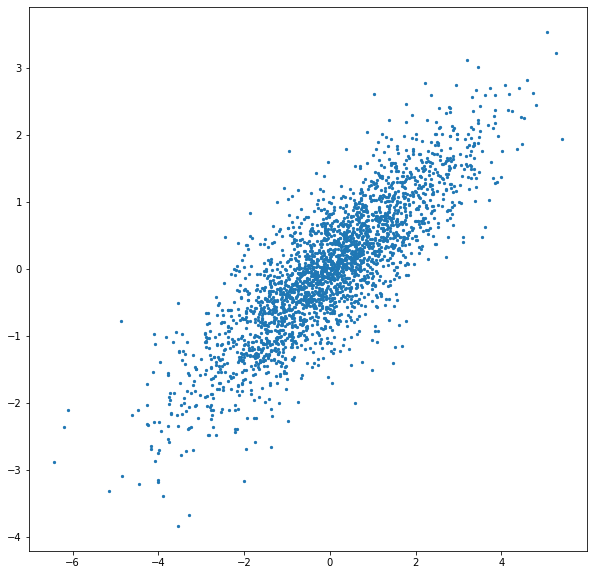

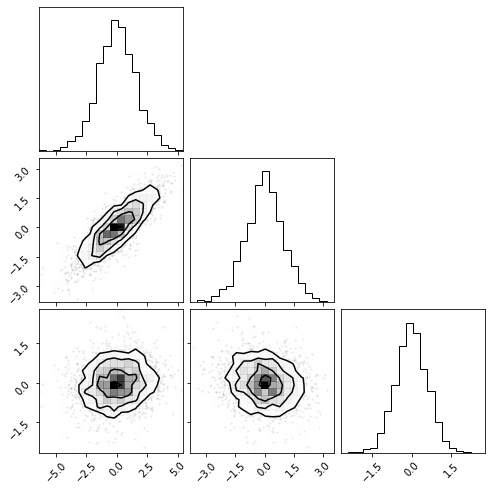

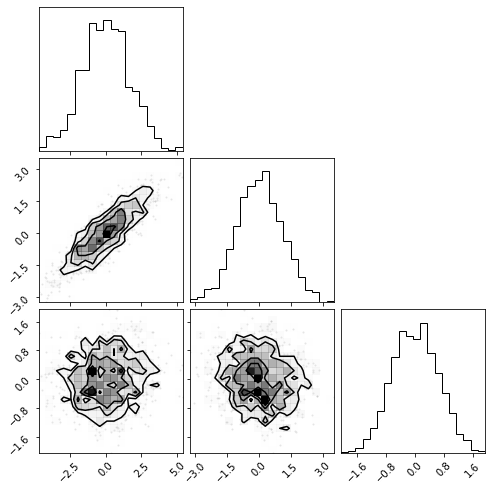

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.scatter(trace2[:,0],trace2[:,1],s=5)
plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    #plt.ylim(botlim,toplim)
    
    #print(np.std(trace[:,dim]))
    

<ipython-input-10-6f7ec4927568>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[1.59821087 1.15868225 0.3459106 ]
 [1.15868225 1.00115589        nan]
 [0.3459106         nan 0.62022347]]


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


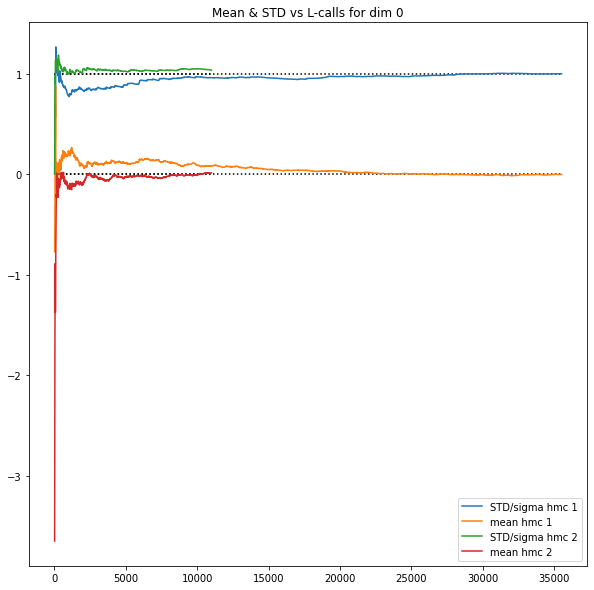

In [10]:
print(np.sqrt(cov))

plot_conv(trace,0,-1,1.5,1, cov, calls)
plot_conv(trace2,0,-1,1.5,2, cov, calls2)
plt.show()